# 【introduction】
漫画ドラえもんには「バイバイン」という道具が登場する、2のn乗に関する有名なエピソード[1]があります。  

[1] 藤子・Ｆ・不二雄(1979)『ドラえもん（１７）』小学館.  

「バイバイン」は薬品で、これを振掛けるとその物体は5分ごとに倍に増えるという働きがあります。作中では栗まんじゅうを増やしますが、食べきれなくなったためロケットを使い宇宙に捨てました。  

ここで度々話題になるのが、栗まんじゅうはその後宇宙でどのように増えていくのかについてです。様々な議論がされていますが、今回は単純に栗まんじゅうの体積がどう増えるかを計算してみましょう。

# 【問題】栗まんじゅうが太陽系を覆う日
1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。


栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。


ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

In [1]:
import math

In [2]:
# 目的の体積が見つからないので、得られた半径を元に体積を求める。
# 栗まんじゅうの体積
MANJU = (4/3)*math.pi*0.015**3
# 太陽系の体積
TAIYOUKEI = (4/3)*math.pi*1.514e+16**3

In [3]:
def satisfy_time(start_volume, end_volume):
    list_volume = [start_volume]
    list_time = [0]
    while end_volume > start_volume:
        start_volume *= 2
        list_volume.append(start_volume)
        list_time.append((len(list_volume) - 1)*5)
    
    return list_volume, list_time

In [4]:
_, list_time_manju = satisfy_time(MANJU, TAIYOUKEI) 

In [5]:
print(f'太陽系が栗まんじゅうで覆われるのは、{list_time_manju[-1]}分後です。')

太陽系が栗まんじゅうで覆われるのは、900分後です。


In [6]:
# ボールの体積
BALL = (4/3)*math.pi*0.037**3
# 東京ドームの体積
TOKYO_DOME = 1240000

In [7]:
list_volume, list_time_ball = satisfy_time(BALL, TOKYO_DOME)

In [8]:
print(f'東京ドームがボールで覆われるのは、{list_time_ball[-1]}分後です。')

東京ドームがボールで覆われるのは、165分後です。


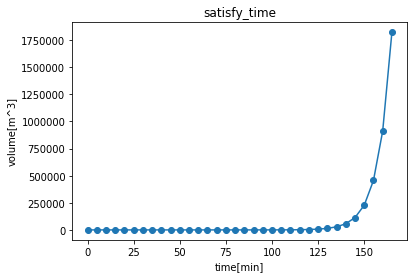

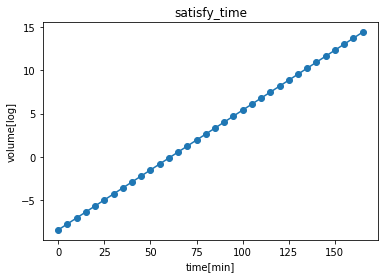

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('satisfy_time')
plt.xlabel('time[min]')
plt.ylabel('volume[m^3]')
plt.plot(list_time_ball, list_volume, marker='o')
plt.show()

# 対数グラフの表示
log_list_volume = []
for i in list_volume:
    log_list_volume.append(math.log(i))

plt.title('satisfy_time')
plt.xlabel('time[min]')
plt.ylabel('volume[log]')
plt.plot(list_time_ball, log_list_volume, marker='o')
plt.show()

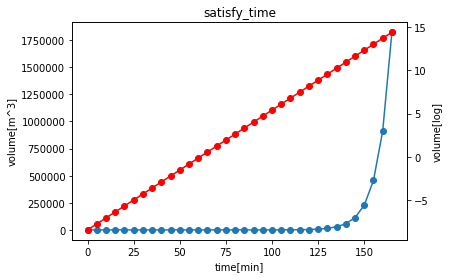

In [10]:
# 重ねて表示
fig, ax1 = plt.subplots()
plt.xlabel('time[min]')
ax1.plot(list_time_ball, list_volume, marker='o')
plt.ylabel('volume[m^3]')
ax2 = ax1.twinx()
ax2.plot(list_time_ball, log_list_volume, marker='o', color='red')
plt.title('satisfy_time')
plt.ylabel('volume[log]')
plt.show()